## Abonnieren (Subscriben) von Topics

Variante A) Jeder Messwert wird über ein eignes Topic abonniert

In [ ]:
import paho.mqtt.client as mqtt
from datetime import datetime as dt

DefaultBroker = "test.mosquitto.org"
DefaultPort = 1883
DefaultTopic = "Coding_Seminar/#"
Topic1 = "Coding_Seminar/DHT22/time"
Topic2 = "Coding_Seminar/DHT22/temp"
Topic3 = "Coding_Seminar/DHT22/hum"

def on_message(client, userdata, message):
    print("message topic=",message.topic)
    print("message received ",str(message.payload.decode("utf-8")))
    print("message qos=",message.qos)
    print("message retain flag=",message.retain)

client = mqtt.Client()
client.on_message = on_message

client.connect(DefaultBroker,DefaultPort)
client.subscribe(DefaultTopic)

if __name__ == "__main__":
    client.loop_forever()

## Schreiben des abonnierten Topics in eine Datei

Variante B): Alle Messwerte über ein Topic abonniert

In [ ]:
import paho.mqtt.client as mqtt
from datetime import datetime as dt

DefaultBroker = 'test.mosquitto.org'
DefaultPort = 1883
Topic = 'Coding_Seminar/DHT22'

def on_message(client, userdata, message):
    print('message topic=',message.topic)
    print('message received ',str(message.payload.decode('utf-8')))
    with open('./data/measureData.csv','a+') as f:
        f.write(str(message.payload.decode('utf-8'))[1:-1]+ '\n')

with open('./data/measureData.csv','w') as f:
    f.write('time,temp,hum'+'\n')
        
client = mqtt.Client()
client.on_message = on_message

client.connect(DefaultBroker,DefaultPort)
client.subscribe(Topic)

if __name__ == '__main__':
    client.loop_forever()

# Darstellen der gespeicherten Messwerte in einem Diagramm

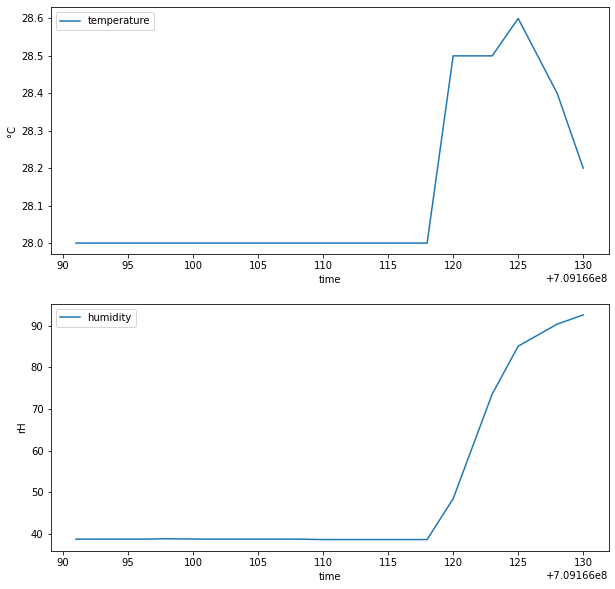

In [53]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('./data/measureData.csv', index_col='time', parse_dates=True)
df
plt.figure(figsize=(10,10)) 

# temperatures
plt.subplot(211)
plt.plot(df.index,df.temp)
plt.legend(['temperature'])                
plt.xlabel('time') 
plt.ylabel('°C')

# moistures
plt.subplot(212)
plt.plot(df.index,df.hum)
plt.legend(['humidity'])
plt.xlabel('time') 
plt.ylabel('rH')

plt.show()